<a href="https://colab.research.google.com/github/cairoegito/Cluster-no-IFOOD/blob/main/Desafio_IFOOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1- OBJETIVO DE NEGÓCIO**

Entender melhor a base de dados e extrair informações sobre os clientes do IFOOD, como eles se comportam, como eles são impactados e o que os influenciam.

### **1 - Limpeza de dados e tratamentos necessários**

In [4]:
#Importando Bibliotecas de Análise exploratória de dados
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import date
import warnings
warnings.filterwarnings('ignore')
from pandas.api.types import is_string_dtype, is_numeric_dtype
import scipy.stats as stats
import folium as flm

#Feature Engineer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Machine Learning
from sklearn.cluster import KMeans
import plotly.express as px
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Importando datasets
df_base = pd.read_excel("/content/drive/MyDrive/Desafio IFOOD/Documentação Base - Clustering.xlsx")
df_marketing = pd.read_csv("/content/drive/MyDrive/Desafio IFOOD/Marketing (3).xls", sep=";")
df_orders = pd.read_csv("/content/drive/MyDrive/Orders (1).xls", sep=";")
df_sessions = pd.read_csv("/content/drive/MyDrive/Desafio IFOOD/sessions.xls", sep=";")



In [4]:
#Visualizando datasets
df_marketing.head()

,account_id,registration_date,ifood_status,ifood_status_last_month,total_order_count,first_order_date
0,7c0450e7-a806-4208-8449-e4269a27e6b5,2020-02-02,Inactive,Inactive,8,2020-02-28
1,16d0afba-00b8-427a-ba1f-2e397a9fbb54,2016-05-17,Churn,Active,457,2017-03-19
2,61c051ee-d37c-45c6-8c22-c236db3b62b7,2018-09-02,Active,Active,206,2018-09-02
3,82e48692-e4fa-494e-b03e-6815a819b7b1,2017-11-10,Reactivated,Churn,47,2018-05-01
4,382af025-14c8-4ba9-b62f-deddd6f25789,2019-08-05,Inactive,Inactive,66,2019-08-12


In [5]:
#Visualizando datasets
df_orders.head()

,order_id,order_shift,order_origin,delivery_fee,scheduled,total_amount,subsidy_amount,device_platform,device_type,device_app_version,...,merchant_long,merchant_lat,has_free_delivery,confirmed_date,concluded_date,lag_last_order,account_id,review_score,nps_score,review_created_at
0,000f4c94-ec38-488b-ad98-9bf3ea19d517,weekday lunch,RESTAURANT,875.0,False,5375.0,0.00,ANDROID,MOBILE,9.39.1,...,-43.38,-22.83,False,2020-02-28T14:07:25.953Z,2020-02-28T16:06:03.701Z,1.0,70a2a5a3-8071-47fc-a623-e9995045314e,5.0,8,2020-02-28T19:06:31.861Z
1,0018ed39-3ae0-4047-9c9e-fd9a2027e645,weekend dinner,RESTAURANT,0.0,False,2987.5,1250.00,IOS,MOBILE,9.63.0,...,-43.22,-22.93,True,2020-08-21T21:12:23.295Z,2020-08-21T21:59:18.732Z,1.0,407bab9f-f485-48cd-abea-66e6283058c3,5.0,8,2020-09-04T00:14:14.365Z
2,00214248-5a2d-4333-a919-c1f3afd31389,weekday dinner,RESTAURANT,0.0,False,3737.5,2123.75,IOS,MOBILE,9.56.0,...,-46.67,-23.62,True,2020-07-02T20:21:51.900Z,2020-07-02T20:53:39.176Z,3.0,a16865d2-a3ca-4251-afab-083dadeb06e9,5.0,5,2020-07-03T03:49:03.214Z
3,007199e6-6be4-42d0-986c-a0de7650dc80,weekday dinner,RESTAURANT,862.5,False,2237.5,1.25,DESKTOP,SITE,8.39.0,...,-43.40,-22.96,False,2020-08-19T20:16:16.718Z,2020-08-19T22:16:16.298Z,0.0,a7f00fd8-d5d6-4604-9bce-ffe35b16848d,5.0,10,2020-08-26T17:44:08.137Z
4,00bb6d10-0a9b-4fe3-9b25-8d18f50bcc3a,weekday lunch,RESTAURANT,0.0,False,2750.0,0.00,DESKTOP,SITE,8.12.0,...,-46.64,-23.59,True,2020-04-15T13:01:55.231Z,2020-04-15T17:02:37.723Z,1.0,63284037-3ade-4600-88e9-5009b9504d8f,5.0,10,2020-04-17T22:05:13.983Z


In [ ]:
#Visualizando datasets
df_sessions.head()

,session_id,user_account_uuid,session_started,session_ended,install_timestamp,sum_view_restaurant_screen,sum_view_dish_screen,sum_click_add_item,sum_view_checkout,sum_callback_purchase,first_order_has_voucher,media_campaign,load_time,available_restaurants,rownumber
0,0a364c77-4375-4334-8f64-a06bdd22229c,5a2fbdea-e2ee-41a5-b47c-41fbebdc78ef,2020-02-01T00:00:03.924Z,2020-02-01T00:10:51.217Z,NaN,19,5,6.0,6.0,7.0,False,NaN,5.0,462.0,1.0
1,b01811cd-ad2c-42f1-bccf-b90698ccc7a8,20cb43a7-c90d-4451-b067-e1b934746de6,2020-02-01T00:00:09.616Z,2020-02-01T00:14:22.713Z,NaN,14,1,0.0,0.0,0.0,NaN,NaN,5.0,128.0,2.0
2,aa453bd1-da47-4cfa-9ce7-a7e2c9227dec,b6bd9094-c2f0-471c-b6ec-9475d8d0591b,2020-02-01T00:00:14.479Z,2020-02-01T00:08:20.102Z,NaN,31,4,4.0,3.0,1.0,False,NaN,6.0,187.0,3.0
3,39ca6d98-c9d1-4dff-9158-c7416be6d309,d7ddb2ac-31bf-4e3d-848a-9efc86a70f6d,2020-02-01T00:00:14.650Z,2020-02-01T00:02:49.615Z,NaN,12,3,0.0,0.0,0.0,NaN,NaN,5.0,22.0,4.0
4,cf456658-0426-46c2-b6c1-fc27c186e15e,8d9bb514-cc57-4181-bb9d-b94b7fbbfd98,2020-02-01T00:00:41.607Z,2020-02-01T00:16:57.415Z,NaN,4,0,0.0,0.0,0.0,NaN,NaN,28.0,3.0,5.0


In [ ]:
#ANALISANDO O TAMANHO DOS DATASETS
df_marketing.shape


(20249, 6)

In [ ]:
df_orders.shape


(226269, 34)

In [ ]:
df_sessions.shape

(188489, 15)

In [5]:
#Checando missings
df_marketing.isnull().sum()

account_id                 0
registration_date          0
ifood_status               0
ifood_status_last_month    0
total_order_count          0
first_order_date           1
dtype: int64

In [6]:
#Excluindo os missings
df_marketing = df_marketing.dropna()

In [ ]:
#Checando missings
df_orders.isnull().sum()

order_id                   0
order_shift                0
order_origin               0
delivery_fee               0
scheduled                  0
total_amount               0
subsidy_amount             0
device_platform            0
device_type                0
device_app_version      4435
centroid_id                0
state_label                0
city                       0
district                   0
customer_long              0
customer_lat               0
restaurant_id              0
dish_type                  0
group_id                   0
merchant_centroid_id       0
merchant_state             0
merchant_city              0
merchant_district          0
merchant_zipcode           0
merchant_long              0
merchant_lat               0
has_free_delivery          0
confirmed_date            14
concluded_date             4
lag_last_order           184
account_id                 0
review_score               0
nps_score                  0
review_created_at          0
dtype: int64

In [7]:
#Aja visto que o dataset de orders possui mais de 200 mil linhas e o valor de missing é muito pequeno perante isso, irei dropar os mesmos
df_orders = df_orders.dropna()

In [ ]:
#Checando o último dataset 
df_sessions.isnull().sum()

session_id                         0
user_account_uuid                  0
session_started                    0
session_ended                   1477
install_timestamp             187786
sum_view_restaurant_screen         0
sum_view_dish_screen               0
sum_click_add_item                 1
sum_view_checkout                  1
sum_callback_purchase              1
first_order_has_voucher       104426
media_campaign                186984
load_time                      30994
available_restaurants              1
rownumber                          1
dtype: int64

In [8]:
del df_sessions['first_order_has_voucher']

In [9]:
del df_sessions['media_campaign']

In [10]:
del df_sessions['load_time']

In [11]:
#Novamente excluindo esses poucos missings depois de deletar algumas colunas muito prejudicadas
df_sessions.dropna()

,session_id,user_account_uuid,session_started,session_ended,install_timestamp,sum_view_restaurant_screen,sum_view_dish_screen,sum_click_add_item,sum_view_checkout,sum_callback_purchase,available_restaurants,rownumber
20,77b0e143-a9d3-4e02-bb17-f8bd9233aa0b,dd29f99e-e072-45f3-8731-3c2da182a18c,2020-02-01T00:01:45.519Z,2020-02-01T00:15:59.548Z,2020-02-01T00:01:45.000Z,1,2,2.0,6.0,8.0,615.0,21.0
709,5f92fd0f-10eb-465e-b42a-d443a2820d3e,11ac1f46-9691-4795-aa5a-57df3d01295d,2020-02-01T02:06:38.558Z,2020-02-01T03:23:01.484Z,2020-02-01T02:06:38.000Z,13,6,2.0,3.0,3.0,26.0,710.0
749,f3dc7ab3-4c76-4693-842b-19fa0c44267b,18b2b703-842d-4747-b360-54e219e9b7a2,2020-02-01T02:21:59.059Z,2020-02-01T02:35:30.772Z,2020-02-01T02:21:59.000Z,14,15,12.0,31.0,22.0,13.0,750.0
777,458bf927-e686-4637-b2da-1831563fb1fb,ba7f09e5-aebe-453a-ab34-9f4b3e9e56a9,2020-02-01T02:33:41.307Z,2020-02-01T02:41:47.214Z,2020-02-01T02:33:41.000Z,0,0,0.0,0.0,0.0,3.0,778.0
794,f53b26ee-bc89-4df2-95fc-31776b6cbd7a,0524e9d8-f8a1-48fc-a9be-2fc352fa730f,2020-02-01T02:42:26.581Z,2020-02-01T03:01:27.022Z,2020-02-01T02:42:26.000Z,2,1,1.0,1.0,0.0,128.0,795.0
...,...,...,...,...,...,...,...,...,...,...,...,...
187718,87e8a955-5f66-4b34-9be5-a0ca717e0904,32450a12-1b97-4ed3-98fb-dab274db9a81,2020-02-12T12:59:30.570Z,2020-02-12T13:08:56.900Z,2020-02-12T12:59:30.000Z,1,1,1.0,10.0,9.0,17.0,187719.0
187840,76ae4583-ba12-45e6-a531-a4e4cdeaf7ed,74dbb6bb-4636-4f05-9604-d3a05bde45f6,2020-02-12T13:05:33.143Z,2020-02-12T13:39:35.398Z,2020-02-12T13:05:33.000Z,28,15,10.0,8.0,21.0,224.0,187841.0
187931,33686a46-c66b-42da-9002-b7e62659adb1,5ee8868c-11f8-4287-ae18-47a12e621121,2020-02-12T13:10:34.105Z,2020-02-12T13:38:32.715Z,2020-02-12T13:10:34.000Z,4,1,0.0,0.0,0.0,2680.0,187932.0
188195,883b024f-f0cc-46e3-838b-666b28ff4c49,35553c9b-4da5-46d5-8b0e-5e363e341d39,2020-02-12T13:24:27.708Z,2020-02-12T13:50:03.769Z,2020-02-12T13:24:27.000Z,8,4,3.0,3.0,1.0,3198.0,188196.0


## 2 -**Vou prosseguir com a análise exploratória com os datasets separados para retirar o máximo de insights possíveis. (EDA)**

In [12]:
#Observando melhor os datasets
df_marketing.describe()

,total_order_count
count,20248.000000
mean,341.338058
std,303.148108
min,1.000000
25%,91.000000
50%,286.000000
75%,501.000000
max,3098.000000


In [13]:
#Convertendo data de cadastro para tempo de uso da plataforma
df_marketing['registration_date'] = pd.to_datetime(df_marketing['registration_date'], format = '%Y-%m-%d')

def calculate_cadastro(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df_marketing['Tempo_de_cadastro'] = df_marketing['registration_date'].apply(calculate_cadastro)

In [14]:
#Visualizando nosso dataset de marketing
df_marketing.head()

,account_id,registration_date,ifood_status,ifood_status_last_month,total_order_count,first_order_date,Tempo_de_cadastro
0,7c0450e7-a806-4208-8449-e4269a27e6b5,2020-02-02,Inactive,Inactive,8,2020-02-28,2
1,16d0afba-00b8-427a-ba1f-2e397a9fbb54,2016-05-17,Churn,Active,457,2017-03-19,6
2,61c051ee-d37c-45c6-8c22-c236db3b62b7,2018-09-02,Active,Active,206,2018-09-02,4
3,82e48692-e4fa-494e-b03e-6815a819b7b1,2017-11-10,Reactivated,Churn,47,2018-05-01,4
4,382af025-14c8-4ba9-b62f-deddd6f25789,2019-08-05,Inactive,Inactive,66,2019-08-12,3


In [15]:
#Estudando a nova variável criada
df_marketing["Tempo_de_cadastro"].value_counts()

3     3993
4     3110
5     2950
6     2859
7     2810
2     1612
8     1426
9      834
10     353
11     173
12     128
Name: Tempo_de_cadastro, dtype: int64

Aqui vale a ressalva que a base de dados é formada por  clientes mais estáveis. Independente de serem churn ou não eles utilizaram por um bom tempo a plataforma IFOOD. Notamos também que o pico de cadastro ocorreu no ano de 2019 e foi muito afetado em 2020, provavelmente pela pandemia

In [16]:
#Observando onde são feitos os pedidos
x = df_orders["device_platform"].value_counts()

In [17]:
df_orders["device_platform"].value_counts()

ANDROID    117953
IOS         84987
DESKTOP     18693
Name: device_platform, dtype: int64

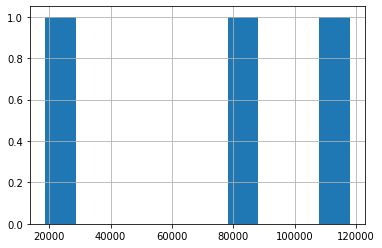

In [18]:
#Plotando o gráfico para observar a diferença da origem dos pedidos
x.hist()

Como esperado, a grande maioria é feito através de smarthphones, tendo uma diferença considerável entre IOS e Android. Aja visto que no mercado os aparelhos da Apple costumam ser mais caros, vamos observar isso mais de perto para ver se há uma diferença considerável entre os preços dos pedidos feitos pelo IOS e pelo Android

In [19]:
#Observando a média do valor dos pedidos
y = df_orders["total_amount"].mean()

In [20]:
#Vamos checar de onde parte pedidos acima da média
z = df_orders[df_orders["total_amount"] > y]


In [21]:
#Por fim, relação entre pedidos acima da média e suas respectivas origens
z['device_platform'].value_counts()

IOS        40531
ANDROID    37792
DESKTOP      887
Name: device_platform, dtype: int64

Não encontramos correlação aparente, o que nos leva a crer que as compras de Iphone e de Androids possuem aproximadamente mesmo valor, portanto o foco do Ifood ainda pode continuar sendo o serviço mobile de forma geral sem distinção financeira aparente entre os modelos

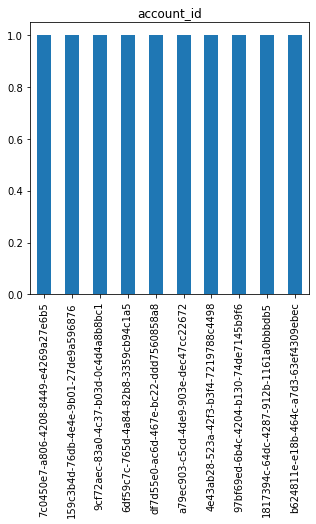

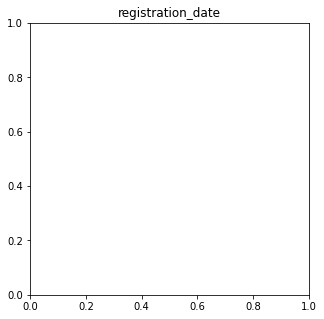

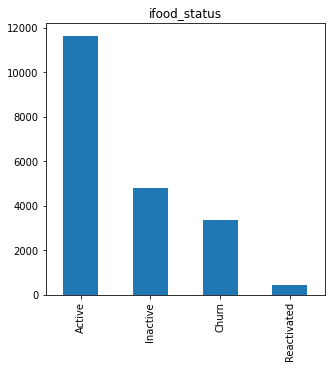

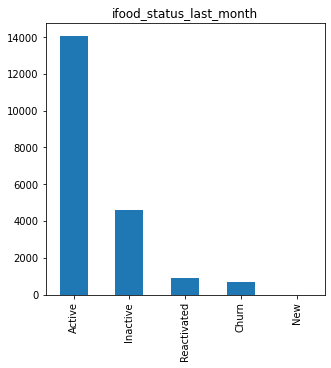

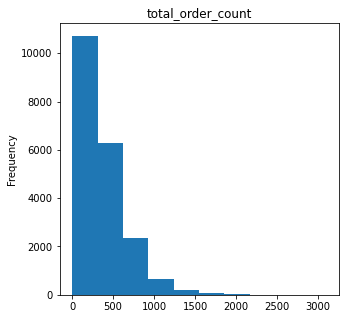

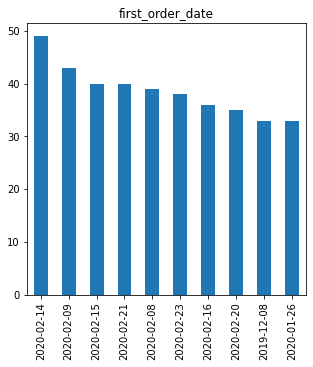

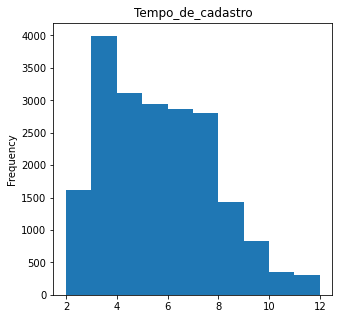

In [24]:
for column in df_marketing:
  plt.figure(column, figsize=(5,5))
  plt.title(column)
  if is_numeric_dtype(df_marketing[column]):
    df_marketing[column].plot( kind = 'hist')
  elif is_string_dtype(df_marketing[column]):
    df_marketing[column].value_counts()[:10].plot(kind = 'bar')

O gráfico do tempo de cadastro nos indica que o pico ocorreu aproximadamente em 2019, o que nos mostra que a plataforma estava em ascensão e obteve certo pico local de novos cadastros. A queda repentina em 2020 pode se dar muito pelo período de pandemia. Notamos também que os clientes churn caíram ao longo do tempo, tendo recentemente um número baixo, o que nos indica que os clientes estão comprando bem e se estabilizando na plataforma

In [ ]:
df_orders.columns

Index(['order_id', 'order_shift', 'order_origin', 'delivery_fee', 'scheduled',
       'total_amount', 'subsidy_amount', 'device_platform', 'device_type',
       'device_app_version', 'centroid_id', 'state_label', 'city', 'district',
       'customer_long', 'customer_lat', 'restaurant_id', 'dish_type',
       'group_id', 'merchant_centroid_id', 'merchant_state', 'merchant_city',
       'merchant_district', 'merchant_zipcode', 'merchant_long',
       'merchant_lat', 'has_free_delivery', 'confirmed_date', 'concluded_date',
       'lag_last_order', 'account_id', 'review_score', 'nps_score',
       'review_created_at'],
      dtype='object')

In [ ]:
#Pegando uma parte do dataset de orders por ser muito grande
df_orders = df_orders.sample(n=1000)

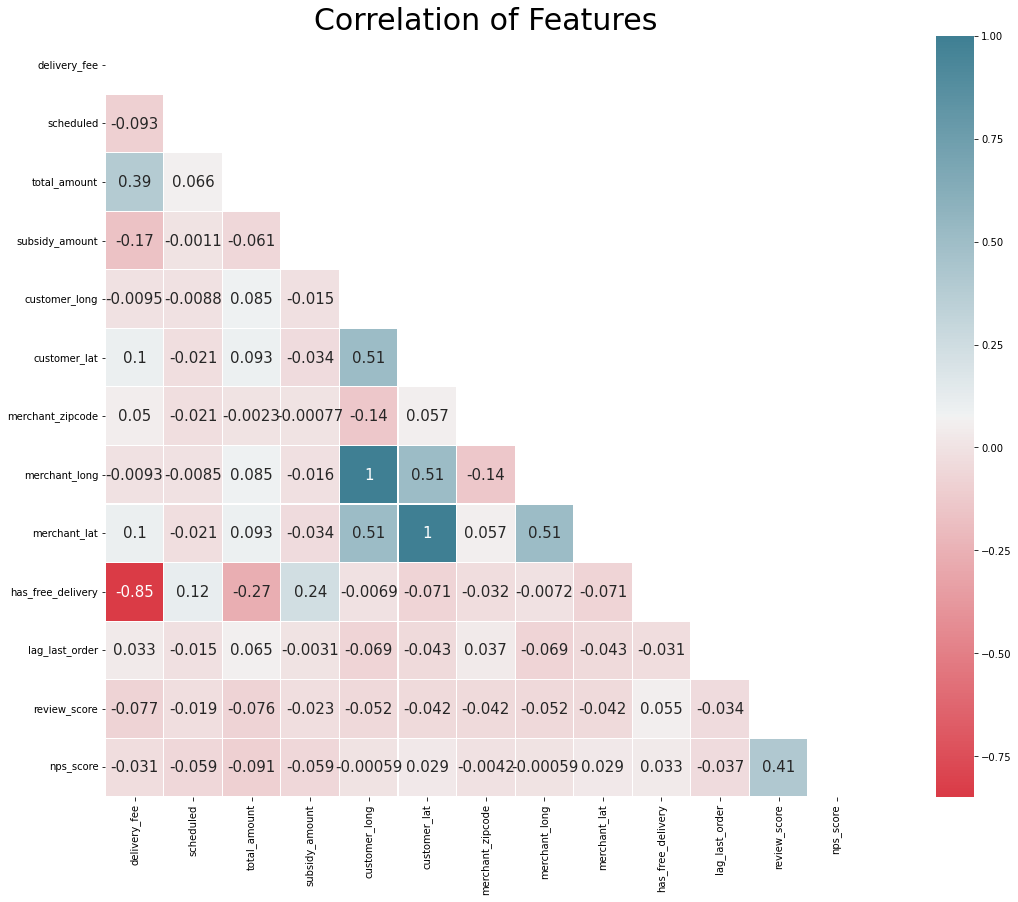

In [ ]:
#Fazendo uma matriz das correlações no dataset de orders
plt.figure(figsize=(25,14))
plt.title('Correlation of Features', size = 30)
colormap = sns.diverging_palette(10, 220, as_cmap = True)

# Não duplicar as infos no gráfico
mask = np.triu(np.ones_like(df_orders.corr(), dtype=bool))

sns.heatmap(df_orders.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            mask=mask,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':15 })
plt.show()

Aqui temos uma boa correlação do "delivery_fee" com "total_amount", o que nos da a ideia de dar cortesias para quem faz pedidos maiores, dentre elas o desconto na taxa de entrega. Vale ressaltar que aqui observamos que não há correlação entre taxa de entrega grátis(has_free_delivery) e o valor do pedido, o que pode nos indicar que os restaurantes que possuem esse benefício podem não ser os da preferência do cliente (situação atual). E se começar a dar isso aos restaurantes de preferência dos clientes, os pedidos poderiam aumentar a frequência.

In [ ]:
# Criando a feature do valor final total do pedido

df_orders['final_amount'] = df_orders['total_amount'] + df_orders['subsidy_amount']

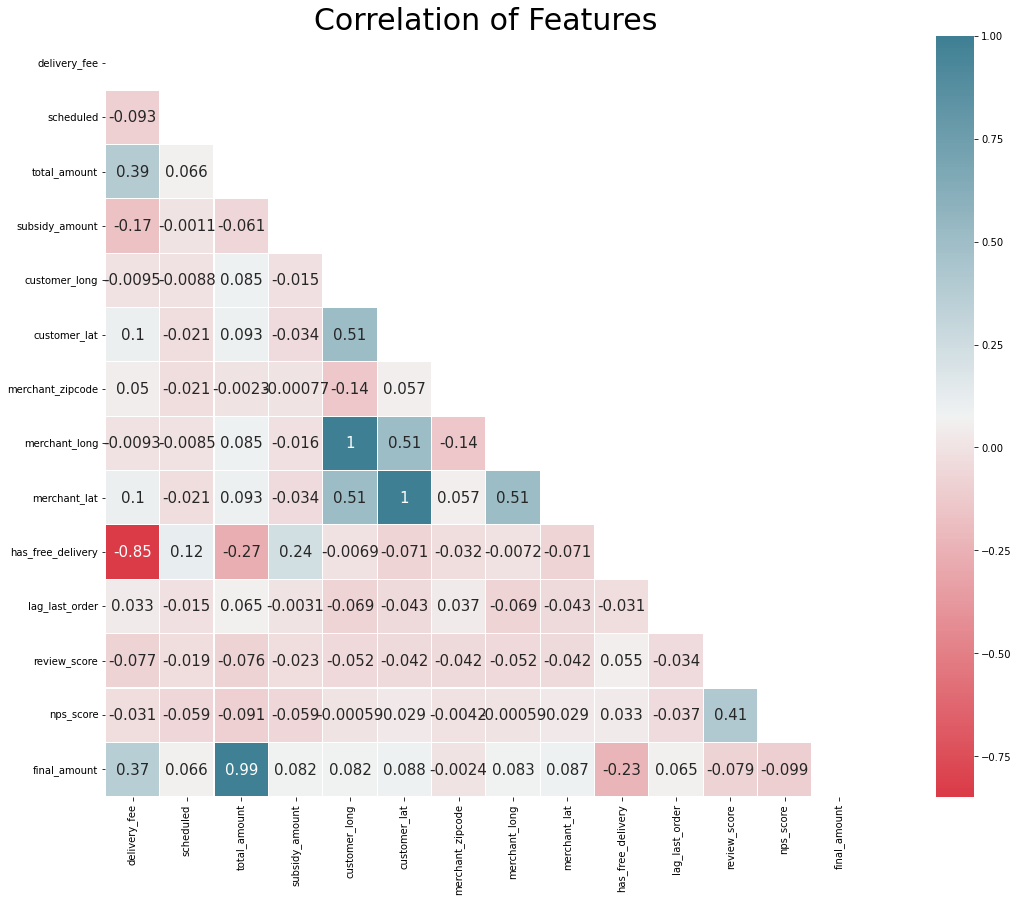

In [ ]:
#Fazendo uma matriz das correlações no dataset de orders novamente
plt.figure(figsize=(25,14))
plt.title('Correlation of Features', size = 30)
colormap = sns.diverging_palette(10, 220, as_cmap = True)

# Não duplicar as infos no gráfico
mask = np.triu(np.ones_like(df_orders.corr(), dtype=bool))

sns.heatmap(df_orders.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            mask=mask,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':15 })
plt.show()

Aqui analisamos uma certa correlação entre as variáveis "lag_last_order" -diferença de dias entre o pedido atual e o último-  e "final_amount" -valor final da compra-, possivelmente indicando que os clientes da plataforma costumam ser fiéis ao produto.

In [ ]:
#Analisando localidades com mais pedidos
df_orders['merchant_city'].value_counts()

SAO PAULO                512
RIO DE JANEIRO           288
CURITIBA                  75
SANTO ANDRE               12
NITEROI                    7
CAMPINAS                   7
OSASCO                     7
GUARULHOS                  7
BRASILIA                   6
PORTO ALEGRE               4
BARUERI                    4
ARACAJU                    4
CARAPICUIBA                4
SAO CAETANO DO SUL         3
RECIFE                     3
EMBU DAS ARTES             3
SANTOS                     2
NILOPOLIS                  2
TABOAO DA SERRA            2
SAO BERNARDO DO CAMPO      2
POA                        2
BAURU                      2
RIO CLARO                  2
COLOMBO                    2
NOVA IGUACU                2
JOAO PESSOA                2
MACEIO                     2
VITORIA DA CONQUISTA       2
INDAIATUBA                 1
PORTO VELHO                1
COTIA                      1
AMERICANA                  1
JUNDIAI                    1
CASCAVEL                   1
MOGI GUACU    

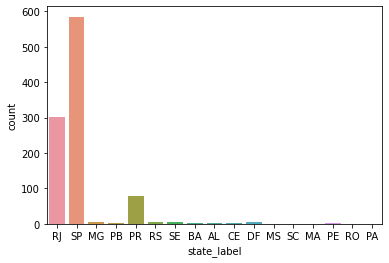

In [ ]:
#Aja visto que SP tem uma liderança folgada dos pedidos nacionais, vamos analisar melhor no gráfico

sns.countplot(data = df_orders,
              x = 'state_label');

In [6]:
#Separando a latitude e longitude
df2 = df_orders.iloc[:,24:26 ]

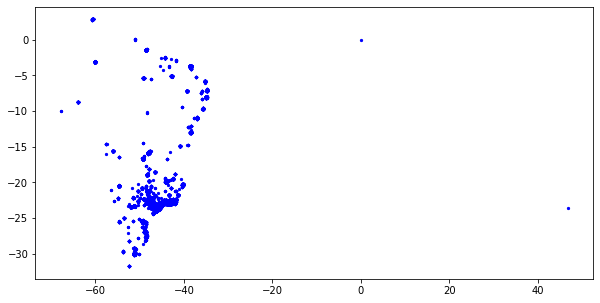

In [7]:
#plotando o gráfico da longitude pela latitude
plt.figure(figsize=(10,5))
plt.scatter(df2['merchant_long'].values,
            df2['merchant_lat'].values,
            s=5, c='blue')

Este gráfico plotado pode ajudar na geolocalização dos pedidos, afinal os mesmos apresentam um cluster bem significativo no intervalo -60 até -40, provavelmente uma região mais central de SP

## **3 - Ajustando o dataset com as transformações numéricas**

In [ ]:
#Pegando uma parte do dataframe de orders pois o mesmo é muito grande
df_orders = df_orders.sample(frac=0.3)

In [ ]:
df_orders.head()

,order_id,order_shift,order_origin,delivery_fee,scheduled,total_amount,subsidy_amount,device_platform,device_type,device_app_version,...,merchant_lat,has_free_delivery,confirmed_date,concluded_date,lag_last_order,account_id,review_score,nps_score,review_created_at,final_amount
205174,24d1a821-4dec-4e4a-be4c-12e2e064086a,weekend snack,RESTAURANT,0.00000,False,3975.00000,623.75000,IOS,MOBILE,9.57.0,...,-25.44000,True,2020-08-01T15:47:50.815Z,2020-08-01T16:08:00.784Z,2.00000,43a243bc-034a-4cff-ab9b-46deb7c1c274,5.00000,6,2020-08-08T18:53:53.754Z,4598.75000
162363,51c1505a-ef36-43b5-bb03-0c9ec6972feb,weekday dinner,RESTAURANT,750.00000,False,4500.00000,0.00000,IOS,MOBILE,9.57.0,...,-21.78000,False,2020-07-22T20:53:07.729Z,2020-07-23T00:53:07.318Z,2.00000,d4a0c4e2-d59a-4638-ade1-9ecbce1f61f5,5.00000,10,2020-07-28T22:56:46.009Z,4500.00000
74365,c2d43ce2-6f92-4e77-bfd6-609cb73e106c,weekend dinner,RESTAURANT,998.75000,False,12123.75000,0.00000,IOS,MOBILE,9.41.0,...,-22.99000,False,2020-03-14T20:26:49.127Z,2020-03-14T20:48:38.348Z,0.00000,f28b13aa-078b-46c0-9cfc-038106364c62,5.00000,10,2020-03-15T14:54:30.274Z,12123.75000
97229,d2fc2179-bf7b-4a96-9b41-6b068d1e1634,weekday lunch,RESTAURANT,625.00000,False,3125.00000,0.00000,ANDROID,MOBILE,9.37.0,...,-22.90000,False,2020-02-07T12:40:12.834Z,2020-02-07T14:40:17.092Z,9.00000,2b04852f-d5b3-4c1c-9104-9559af558e4e,4.00000,10,2020-02-09T02:41:17.041Z,3125.00000
138302,30afb1cb-cd84-4ad6-8731-82225b4b1404,weekday dinner,RESTAURANT,1498.75000,False,7742.50000,0.00000,IOS,MOBILE,9.49.0,...,-22.92000,False,2020-05-06T22:34:01.365Z,2020-05-06T23:19:58.737Z,0.00000,886f0503-f5cf-4d75-9f36-c6b8cfcaff6d,5.00000,1,2020-05-07T17:18:13.515Z,7742.50000


In [ ]:
#Visualizando colunas
df_orders.columns

Index(['order_id', 'order_shift', 'order_origin', 'delivery_fee', 'scheduled',
       'total_amount', 'subsidy_amount', 'device_platform', 'device_type',
       'device_app_version', 'centroid_id', 'state_label', 'city', 'district',
       'customer_long', 'customer_lat', 'restaurant_id', 'dish_type',
       'group_id', 'merchant_centroid_id', 'merchant_state', 'merchant_city',
       'merchant_district', 'merchant_zipcode', 'merchant_long',
       'merchant_lat', 'has_free_delivery', 'confirmed_date', 'concluded_date',
       'lag_last_order', 'account_id', 'review_score', 'nps_score',
       'review_created_at', 'final_amount'],
      dtype='object')

In [ ]:
#Redimensionalizando o dataset com base na correlação com o preço final do pedido
df_orders = df_orders.iloc[:,3:9]

In [ ]:
#Checando o novo dataframe
df_orders.head()

,delivery_fee,scheduled,total_amount,subsidy_amount,device_platform,device_type
205174,0.00000,False,3975.00000,623.75000,IOS,MOBILE
162363,750.00000,False,4500.00000,0.00000,IOS,MOBILE
74365,998.75000,False,12123.75000,0.00000,IOS,MOBILE
97229,625.00000,False,3125.00000,0.00000,ANDROID,MOBILE
138302,1498.75000,False,7742.50000,0.00000,IOS,MOBILE


In [ ]:
#Por se tratar de um dataset com não muitas variáveis utilizaremos o Get Dummies para transformação numérica
df_orders = pd.get_dummies(df_orders, drop_first = True )

In [ ]:
#Normalizando os dados
sc = StandardScaler()
df_orders_scale = sc.fit_transform(df_orders)

## **3- Implementando o KMeans e nosso método preditivo**

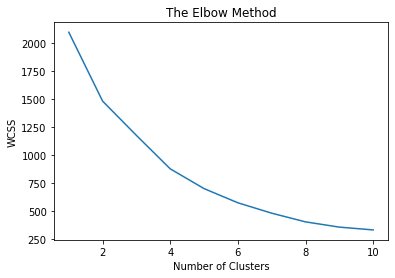

In [ ]:
#Usando Elbow Method para encontrar o melhor K possível
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
  kmeans.fit(df_orders_scale)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss, scalex=True)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Treinando KMeans para K=6
kmeans = KMeans(n_clusters=6, init='k-means++',random_state=42)
y = kmeans.fit_predict(df_orders_scale)

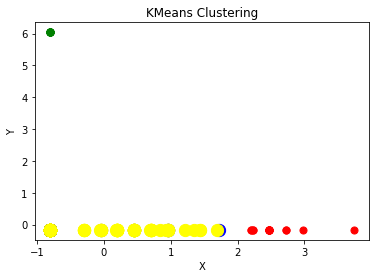

In [ ]:
#Visualizando os Clusters
plt.scatter(df_orders_scale[y==0,0], df_orders_scale[y==0,1], c='red', s=50)
plt.scatter(df_orders_scale[y==1,0], df_orders_scale[y==1,1], c='blue', s=150)
plt.scatter(df_orders_scale[y==2,0], df_orders_scale[y==2,1], c='orange', s=50)
plt.scatter(df_orders_scale[y==3,0], df_orders_scale[y==3,1], c='brown', s=50)
plt.scatter(df_orders_scale[y==4,0], df_orders_scale[y==4,1], c='yellow', s=150)
plt.scatter(df_orders_scale[y==5,0], df_orders_scale[y==5,1], c='green', s=50)
plt.title('KMeans Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
#Visualizando melhor com um gráfico de setor
clusters=pd.DataFrame(df_orders_scale)
clusters['label']=kmeans.labels_
pie=clusters.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label',color=['blue','red','green', 'brown', 'orange', 'yellow'])

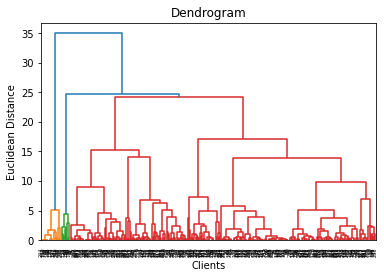

In [ ]:
#Usaremos a distância euclidiana e o método de ligação Ward, que tenta minimizar a variância entre os clusters.
dendrogram = sch.dendrogram(sch.linkage(df_orders_scale,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clients')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
#Calcular os clusters usando os parâmetros definidos em nosso número de clusters escolhido.
hc = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
y = hc.fit_predict(df_orders_scale)
print(y)

[2 0 0 1 0 1 0 1 1 1 1 2 1 1 2 3 1 1 0 1 1 1 1 5 1 2 0 4 4 2 2 0 1 3 2 0 3
 1 1 1 1 2 1 3 4 1 4 0 1 5 2 1 4 4 4 2 1 3 0 3 1 0 1 1 1 1 1 1 5 1 0 2 1 1
 3 1 0 1 2 1 1 1 1 0 1 0 0 0 0 2 5 2 1 4 3 2 1 2 2 1 4 1 4 4 1 4 1 1 1 1 0
 1 0 1 1 1 1 1 2 1 1 1 2 2 5 2 4 2 1 2 2 2 1 1 1 3 3 0 1 1 1 1 1 1 1 1 1 1
 4 1 1 1 2 1 4 0 0 0 0 4 4 2 1 1 1 1 3 0 1 3 1 1 4 0 1 1 4 0 0 1 1 0 5 4 1
 1 1 3 1 2 4 1 0 1 1 1 0 3 1 1 2 3 2 0 2 2 1 1 1 3 1 1 0 1 2 2 1 2 1 1 1 4
 0 1 5 1 2 0 0 1 5 0 1 0 4 0 1 1 0 1 2 1 2 1 3 2 1 1 4 1 1 1 2 2 0 1 0 1 3
 1 1 2 4 4 0 1 0 4 0 1 2 1 0 0 1 1 0 2 0 0 4 2 2 1 0 4 1 1 2 1 2 2 2 1 1 1
 4 0 0 0]


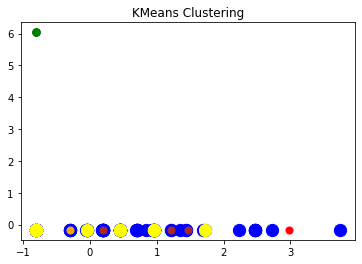

In [ ]:
#Visualizando o modelo
plt.scatter(df_orders_scale[y==0,0], df_orders_scale[y==0,1], c='red', s=50)
plt.scatter(df_orders_scale[y==1,0], df_orders_scale[y==1,1], c='blue', s=150)
plt.scatter(df_orders_scale[y==2,0], df_orders_scale[y==2,1], c='orange', s=50)
plt.scatter(df_orders_scale[y==3,0], df_orders_scale[y==3,1], c='brown', s=50)
plt.scatter(df_orders_scale[y==4,0], df_orders_scale[y==4,1], c='yellow', s=150)
plt.scatter(df_orders_scale[y==5,0], df_orders_scale[y==5,1], c='green', s=50)

plt.title('KMeans Clustering')
plt.show()

In [ ]:
# Silhouette analysis
range_n_clusters = [6]
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_orders_scale)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_orders_scale, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=6, the silhouette score is 0.39640839479314394


In [ ]:
#Listas com nomes das colunas
nomes = ['order_origin', 'delivery_fee', 'scheduled', 'total_amount', 'subsidy_amount', 'device_platform', 'device_type']

In [ ]:
#Incluindo o número de cluster na base de clientes
cluster = pd.DataFrame(df_orders_scale, columns=nomes)
cluster['cluster'] = kmeans.labels_

In [ ]:
cluster

,order_origin,delivery_fee,scheduled,total_amount,subsidy_amount,device_platform,device_type,cluster
0,-0.80914,-0.16552,-0.45992,0.40632,-0.25265,1.34303,-0.26003,4
1,0.70890,-0.16552,-0.35734,-0.57992,-0.25265,1.34303,-0.26003,4
2,1.21239,-0.16552,1.13229,-0.57992,-0.25265,1.34303,-0.26003,2
3,0.45589,-0.16552,-0.62601,-0.57992,-0.25265,-0.74458,-0.26003,0
4,2.22441,-0.16552,0.27622,-0.57992,-0.25265,1.34303,-0.26003,2
...,...,...,...,...,...,...,...,...
295,2.47742,-0.16552,0.27745,-0.57992,-0.25265,-0.74458,-0.26003,2
296,1.71840,-0.16552,0.08205,5.34941,-0.25265,1.34303,-0.26003,3
297,1.21239,-0.16552,1.01017,-0.57992,-0.25265,1.34303,-0.26003,2
298,-0.80914,-0.16552,3.64066,0.40632,-0.25265,1.34303,-0.26003,2


In [ ]:
#Fazendo a média dos clusters em relação a variável do preço final do pedido
cluster.groupby('cluster')['total_amount'].mean()

cluster
0   -0.40377
1   -0.57992
2   -0.31142
3    2.03491
4    0.19675
5   -0.03665
Name: total_amount, dtype: float64

**CONCLUSÃO**

Aqui chegamos a conclusão de que os grupos 3 e 4 são mais relevantes para organizarmos possíveis maiores alcances em pedidos mais altos. Vale ressaltar que os grupos de clusters nos dá algumas informações tais como: É importante oferecer um pedido mais alto para restaurantes mais pertos da localidade do cliente, assim como um desconto na taxa de entrega. Não achamos tanta correlação com a variável entrega grátis por um motivo já mencionado acima